<a href="https://colab.research.google.com/github/soumyabrataroy/Diabetes_Predictor_ML_App/blob/main/Early_stage_diabetes_prediction_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

###Load dataset

In [7]:
dataset = pd.read_csv("diabetes_data_upload.csv")

In [8]:
dataset.head(3)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

**only age is numerical and there are no any missing data** | Class is the target variable which we need to predict.



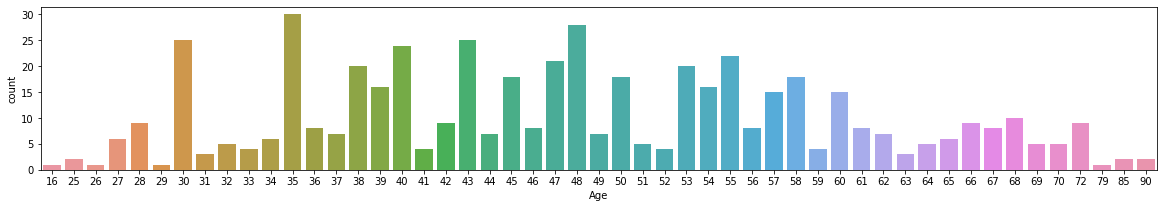

In [10]:
plt.figure(figsize=(20,3))
sns.countplot(x=dataset['Age']);

In [11]:
dataset['Age'].mean()

48.02884615384615

From the above figure found out that, most of the people are in the midde age between (30-50)

In [12]:
len(dataset[dataset["class"]=="Positive"])

320

In [13]:
len(dataset[dataset["class"]=="Negative"])

200

You can see there is a difference between positive and Negative patient count. Positive is 320 and Negative is 200


In [ ]:
dataset[dataset["class"]=="Positive"]["Age"].mean()

49.071875

In [ ]:
dataset[dataset["class"]=="Negative"]["Age"].mean()

46.36

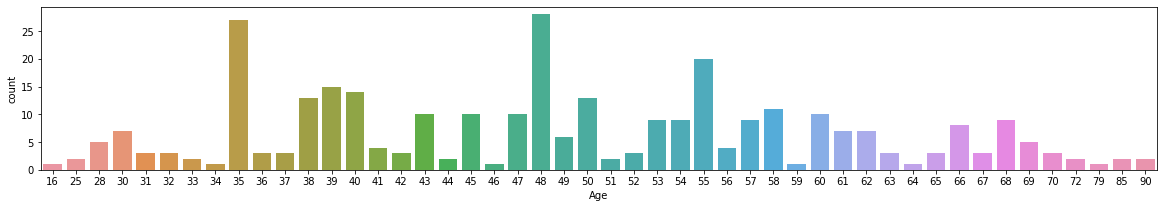

In [14]:
plt.figure(figsize=(20,3))
sns.countplot(x=dataset[dataset["class"]=="Positive"]['Age']);

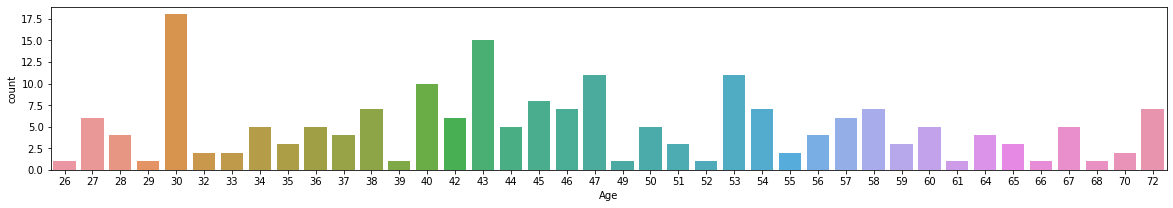

In [15]:
plt.figure(figsize=(20,3))
sns.countplot(x=dataset[dataset["class"]=="Negative"]['Age']);

Although Positive and Negative have different number of counts, their age distribution is almost similar


All other features are categorica data. so need to convert them in numerical data. After conversion, we will match up the Positive and Negative data counts and will apply different algorithms to find out best algo for the prediction

# Converting the data to numerical ones

In [17]:
converted_data=pd.get_dummies(dataset, prefix=['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'], drop_first=True)

In [ ]:
converted_data.head(2)

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1


Collinearity check

<AxesSubplot:>

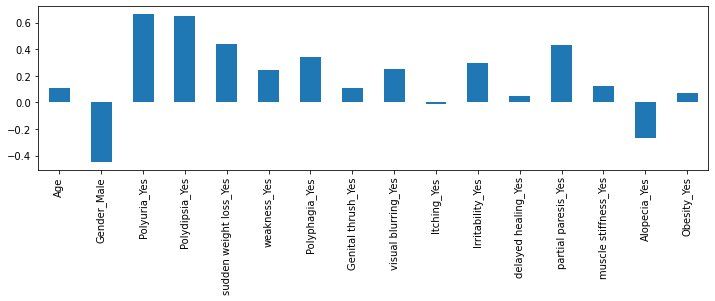

In [18]:
plt.figure(figsize=(12,3))
converted_data.corr()['class_Positive'][:-1].plot(kind='bar')

from the above analysis we coud say Polyuria, Pydipsia could be the main symptons of diabities.
As features don't have much correations to each other. we can take all the features for analysis of diabities detection

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(converted_data.drop('class_Positive', axis=1),converted_data['class_Positive'], test_size=0.3, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[56  6]
 [ 5 89]]


0.9294871794871795

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.30 %
Standard Deviation: 3.68 %


# KNearest Neabour

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[58  4]
 [ 9 85]]


0.9166666666666666

In [28]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.92 %
Standard Deviation: 3.52 %


# Support Vector Linear classifier

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[54  8]
 [ 5 89]]


0.9166666666666666

In [32]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.39 %
Standard Deviation: 3.72 %


# Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[50 12]
 [ 5 89]]


0.8910256410256411

In [38]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.21 %
Standard Deviation: 5.33 %


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[61  1]
 [ 3 91]]


0.9743589743589743

In [42]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.16 %
Standard Deviation: 2.21 %


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = RF_classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[61  1]
 [ 2 92]]


0.9807692307692307

In [ ]:
accuracies = cross_val_score(estimator = RF_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.55 %
Standard Deviation: 2.55 %


In [ ]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp36-none-any.whl size=6000 sha256=9a483a8b3b164263e8c0d8d49dde9b9e84fd095a044a42b55aa88bd183b96248
  Stored in directory: /root/.cache/pip/wheels/cd/05/42/71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin


In [ ]:
import joblib

diabetic_predictor = joblib.load("diabetic_predictor")
scaled_data = joblib.load("Standard Scalar")

From the above resuts we can say that random forest perform best with 97% accuracy
Just to cross check if we could get better results with Catboost 

# XG boost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [ ]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [ ]:
model = xgb.train(param, D_train, steps)

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9521249359959038
Recall = 0.9545298558682225
Accuracy = 0.9551282051282052


# Conclusion

**from above experiments, we could conclude that Random Forest performs better among all. Hence, we will use random forest classifier to create the early stage diabitic predictor**

# Saving the best model

In [ ]:
import joblib
# saveing the model on disk
joblib.dump(RF_classifier,"diabetic_predictor")
joblib.dump(sc,"Standard Scalar")

['Standard Scalar']

In [ ]:
# load the model from disk
loaded_model = joblib.load("diabetic_predictor")
result = loaded_model.score(X_test, y_test)
print(result)

0.9807692307692307


now we have downloaded the model and test it again to verify if it is working properly or not. 
It is time to deploy the model for people to use it.